Assigment-1 (ST-228)

Question:1

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")
%matplotlib inline

In [2]:
Hight= np.random.randint(155,185,1000)

In [3]:
a=Hight.min()
b=Hight.max()

pop_mean= Hight.mean()
pop_var=Hight.var()
pop_std=Hight.std()

pop_mean,pop_var,pop_std

(np.float64(169.285),
 np.float64(76.64377499999999),
 np.float64(8.754643053831492))

1. Generate the following distributions with specified parameters:

i. A uniform distribution with a known population mean and variance. 

In [4]:
uni_pop=np.random.uniform(a,b,1000)
uni_pop_mean=uni_pop.mean()
uni_pop_var=uni_pop.var()
uni_pop_std=uni_pop.std()
uni_pop_mean,uni_pop_var,uni_pop_std

(np.float64(169.3664961976427),
 np.float64(67.184186386579),
 np.float64(8.196596024361515))

Text(0.5, 0, 'Height')

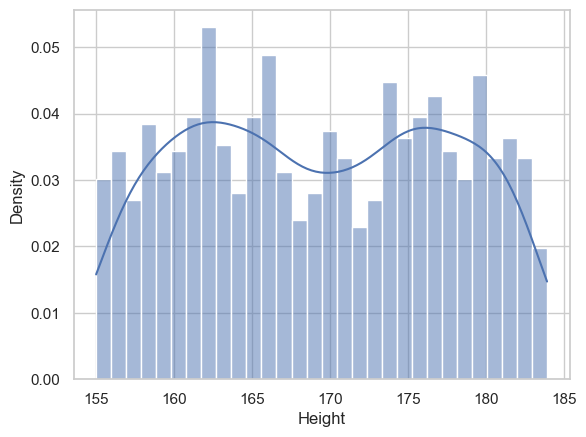

In [5]:
sns.histplot(x=uni_pop, kde=True, stat="density", bins=30)
plt.xlabel('Height')

ii.  A normal distribution with a known population mean and variance. 

In [6]:
normal_dist= np.random.normal(pop_mean, pop_std, 1000)
normal_dist_mean=normal_dist.mean()
normal_dist_var=normal_dist.var()
normal_dist_mean,normal_dist_var

(np.float64(169.39509830396878), np.float64(78.25001125709743))

Text(0.5, 0, 'Height')

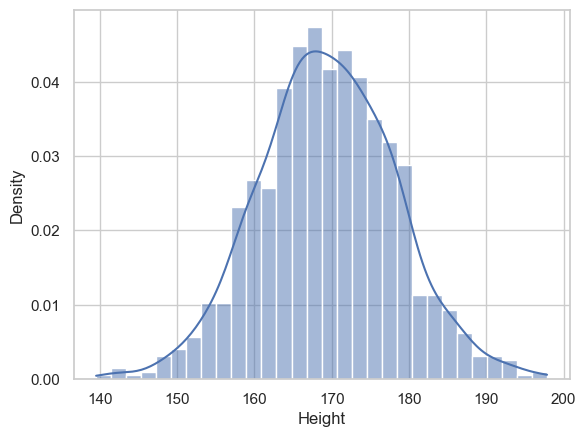

In [7]:
sns.histplot(normal_dist, kde=True, stat='density', bins=30)
plt.xlabel('Height')

iii. An exponential distribution with a known population mean and variance. 

In [8]:
rate=1/(pop_mean)
expo_pop = np.random.exponential(scale=1/rate, size=1000)
expo_pop_mean=expo_pop.mean()
expo_pop_var=expo_pop.var()
expo_pop_mean,expo_pop_var

(np.float64(148.8019644143767), np.float64(23377.34157373631))

Text(0.5, 0, 'Height')

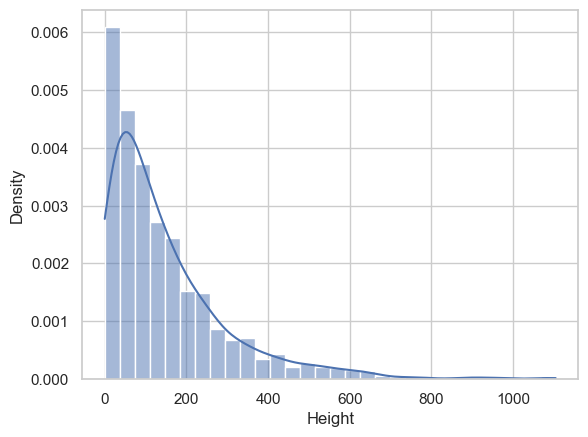

In [9]:
sns.histplot(expo_pop, kde=True, stat="density", bins=30)
plt.xlabel('Height')

# **A.**

**Demonstrate the Central Limit Theorem by showing how the sampling distribution of the mean 
approaches normality as sample size increases**

In [10]:
sample_sizes = [30, 50, 100, 150]
population_sizes = [1000, 5000, 10000]

central limit thorem for Uniform Distribution


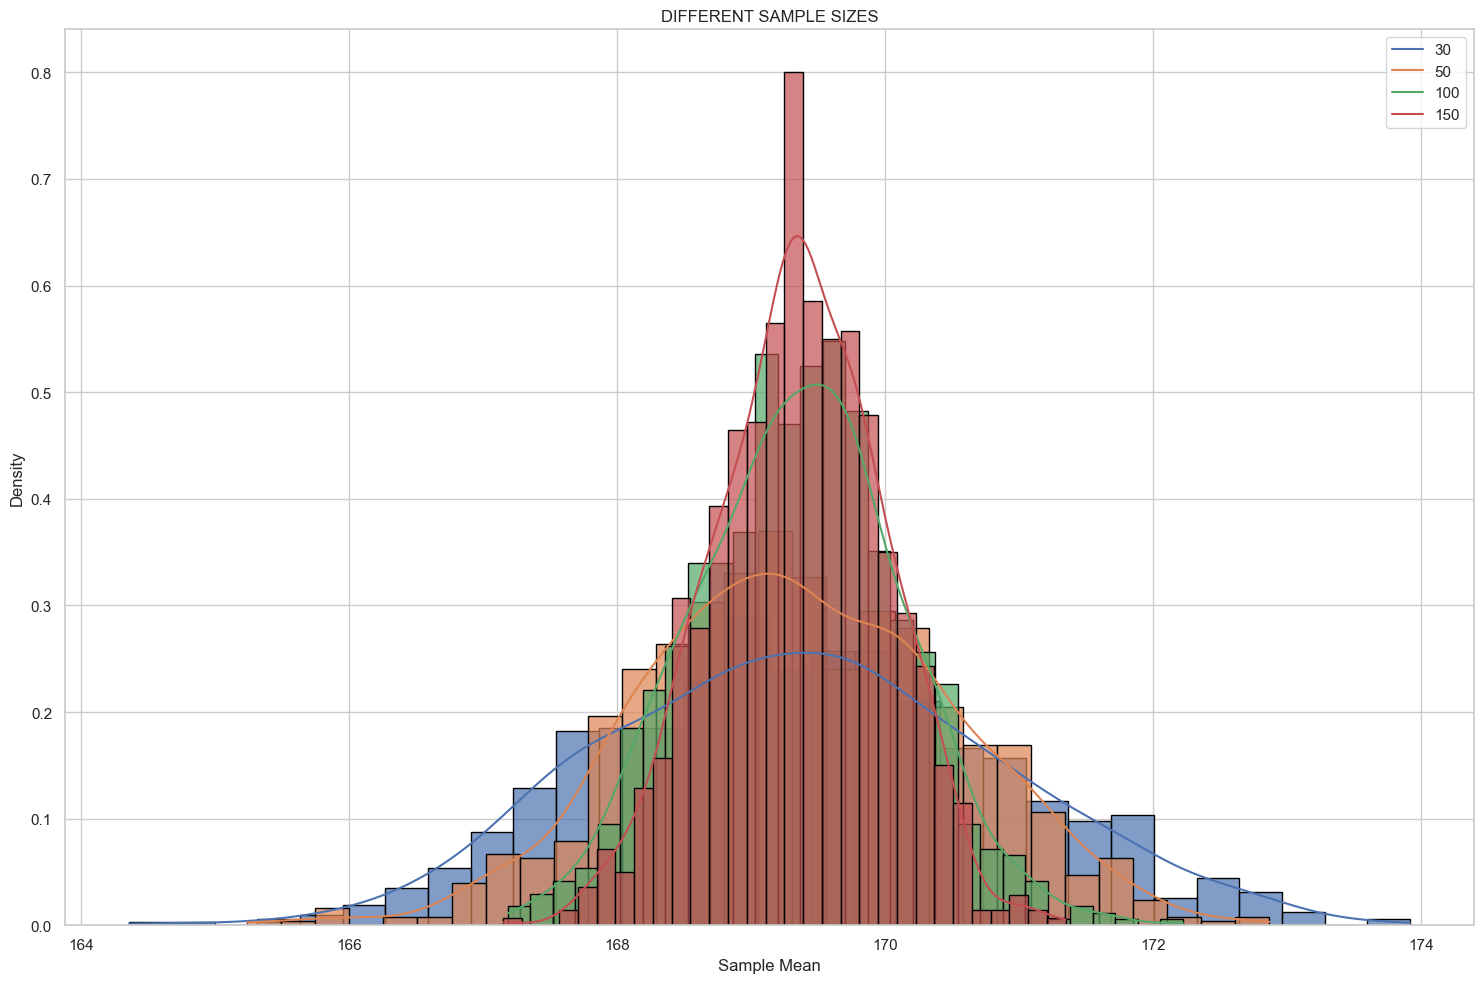

central limit thorem for normal Distribution


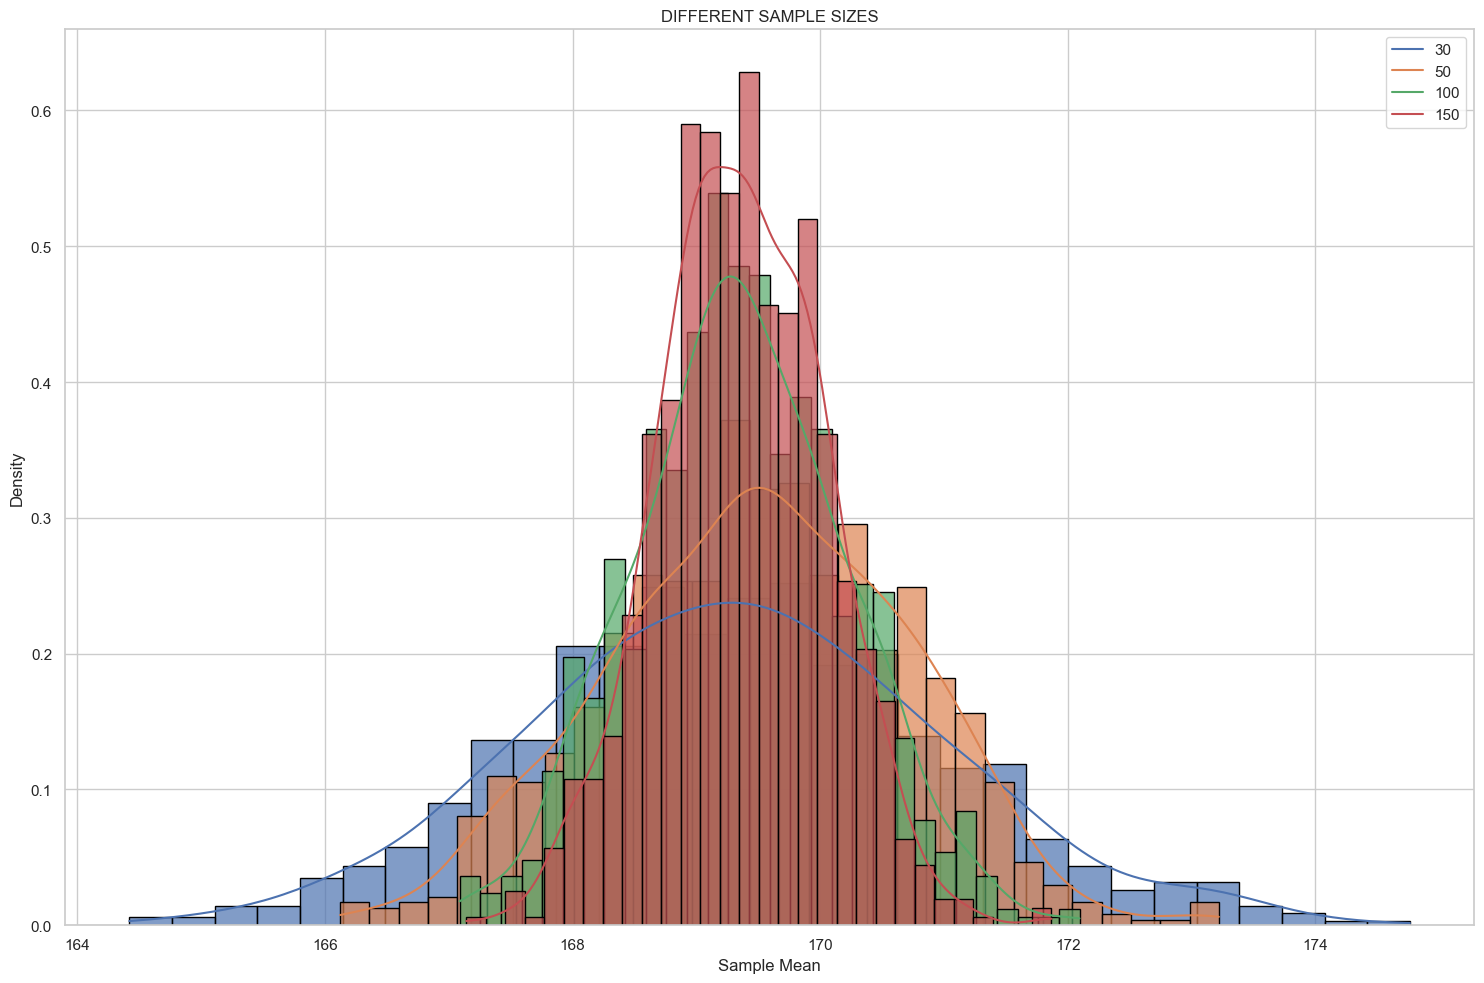

central limit thorem for exponantioal Distribution


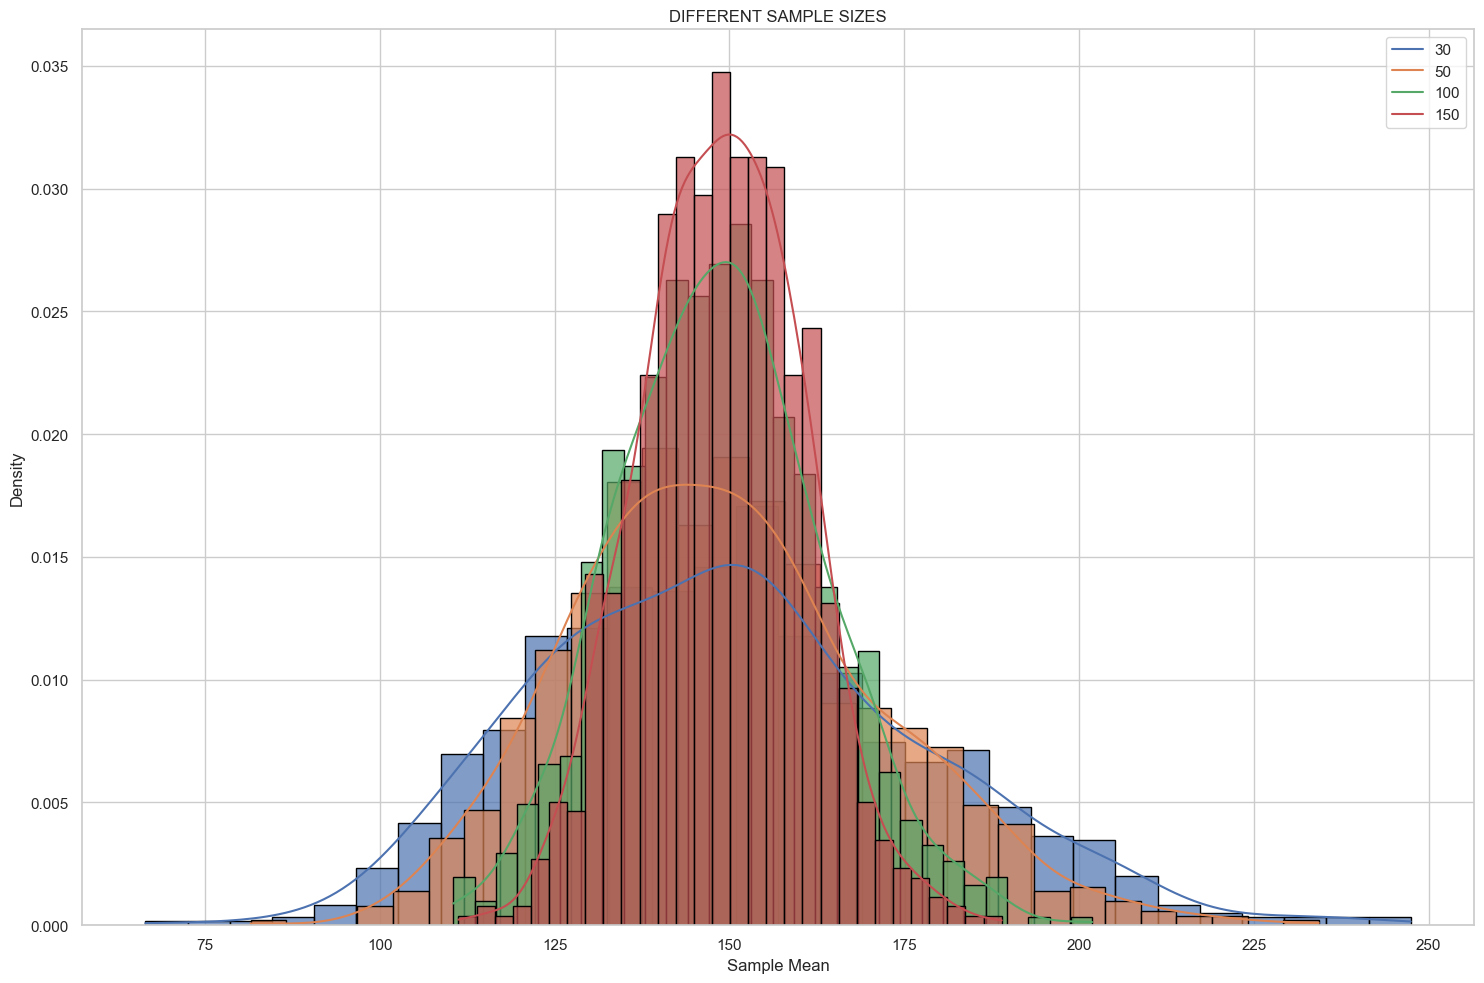

In [11]:
def central_limit_theorem_uniform(population, sample_sizes, num_samples=1000):
    plt.figure(figsize=(15, 10))
    
    for i, n in enumerate(sample_sizes):
        sample_means = []
        
        # Generate sample means
        for _ in range(num_samples):
            sample = np.random.choice(population, size=n, replace=False)
            sample_means.append(np.mean(sample))
        
        # Plot the sampling distribution of the mean
    # plt.subplot(2, 2, i+1)
        sns.histplot(sample_means, kde=True, stat="density", bins=30, edgecolor="black", alpha=0.7)
    plt.title('DIFFERENT SAMPLE SIZES')
    plt.legend(sample_sizes)
    plt.xlabel("Sample Mean")
    plt.ylabel("Density")

    plt.tight_layout()
    plt.show()


print("central limit thorem for Uniform Distribution")
central_limit_theorem_uniform(uni_pop, sample_sizes)


print("central limit thorem for normal Distribution")
central_limit_theorem_uniform(normal_dist, sample_sizes)

print("central limit thorem for exponantioal Distribution")
central_limit_theorem_uniform(expo_pop, sample_sizes)

# **B.**

**Investigate how varying the population size and sample size influences the sample mean and 
sample variance. Focus on a single sample scenario to illustrate the effects.**

In [14]:
results = {}

# Single sample from each population size and sample size
for dist_name, data in [("Uniform", uni_pop), ("Normal", normal_dist), ("Exponential", expo_pop)]:
    dist_results = []
    for N in population_sizes:
        population_data = np.random.choice(data, N)
        for n in sample_sizes:
            sample = np.random.choice(population_data, n, replace=False)
            sample_mean = np.mean(sample)
            sample_variance = np.var(sample)
            dist_results.append((N, n, sample_mean, sample_variance))
    results[dist_name] = dist_results
pd.DataFrame(results["Uniform"], columns=["Population Size", "Sample Size", "Sample Mean", "Sample Variance"])

,Population Size,Sample Size,Sample Mean,Sample Variance
0,1000,30,169.158332,67.621438
1,1000,50,168.121611,68.643957
2,1000,100,168.621826,71.291648
3,1000,150,169.796227,66.308096
4,5000,30,172.251227,72.704986
5,5000,50,169.776206,65.140182
6,5000,100,169.072458,61.238135
7,5000,150,169.058077,68.385549
8,10000,30,168.107143,69.116950
9,10000,50,169.395976,62.887310


# **observations**

**Uniform Distribution:**
The sample mean becomes more consistent with the population mean as the sample size increases, while larger populations reduce variability in the sample variance. Smaller samples and populations exhibit greater fluctuations in both metrics.

**Normal Distribution:**
Sample mean consistently aligns with the population mean, regardless of population size, while sample variance decreases as sample size increases. Larger populations have minimal influence due to the inherent stability of the normal distribution.

**Exponential Distribution:**
Sample mean and variance show high sensitivity to both population and sample sizes. Larger samples stabilize the sample mean and reduce extreme fluctuations in variance, but smaller populations exacerbate these variations.

# **C.**

**Examine how the skewness of the original population distribution affects the conclusions drawn 
from the Central Limit Theorem and the behavior of the sample mean and variance.**

**Impact of Skewness on the Central Limit Theorem (CLT):**

Uniform Distribution:
The sampling distribution of the mean rapidly approaches normality even with small sample sizes (n≥30).Hence the uniform distribution is symmetric and has no skewness, the CLT holds strongly.

Normal Distribution:
The normal distribution is inherently symmetric, so the CLT is less critical here. The sample mean distribution is already normal, and increasing sample size primarily reduces variance, not the shape.

Exponential Distribution:
The exponential distribution is highly skewed, leading to slower convergence to normality for the sampling distribution of the mean. Larger sample sizes (n≥50) are needed for the CLT to visibly apply, with small samples retaining significant skewness.

**Behavior of Sample Mean and Variance:**

Uniform Distribution:
The sample mean and variance stabilize quickly due to the lack of skewness. Outliers are rare, so increasing population or sample size has a predictable effect.

Normal Distribution:
Both the sample mean and variance stabilize effectively with smaller sample sizes because of the symmetric nature of the distribution. Skewness does not play a role here.

Exponential Distribution:
Skewness causes significant variability in the sample mean and variance for small sample sizes. Large samples are required to reduce the influence of extreme values and stabilize the metrics, demonstrating that skewed distributions amplify variability.